In [1]:
import numpy as np

from astroqtpy.basetree import BaseTree
from astroqtpy.quadnode import QuadNode
from astroqtpy.quadpoint import QuadPoint

In [2]:
class MyQuadTree(BaseTree):
    """Custom quadtree.

    A custom class for creating a quadtree with randomly sampled points.

    Args:
        x_min (float): Minimum x value for this quadtree.
        x_max (float): Maximum x value for this quadtree.
        y_min (float): Minimum y value for this quadtree.
        y_max (float): Maximum y value for this quadtree.
    """
    
    def __init__(self, x_min: float, x_max: float, y_min: float, y_max: float) -> None:
        super().__init__(x_min, x_max, y_min, y_max,
                        filename_points = './tutorial_outputs/custom_points.txt',
                        filename_nodes = './tutorial_outputs/custom_nodes.txt'
                        )
        
        
    def evaluate_point(self, node: QuadNode, rng_seed: int) -> QuadPoint:
        """Evaluate point.

        Calculate the value of one point within a given node as either 1 or 0.

        Args:
            node (QuadNode): Quadtree node in which to evaulate point.
            rng_seed (int): Random number generator seed.

        Returns:
            QuadPoint: A QuadPoint object.
        """
        rng = np.random.default_rng(rng_seed)
        
        point = QuadPoint(
            rng.uniform(node.x_min, node.x_max),
            rng.uniform(node.y_min, node.y_max),
            rng.choice([1, 0])
            )
    
        return point

In [3]:
test_tree = MyQuadTree(1,2,3,4)

In [4]:
test_tree.run_quadtree()

Attempting to load previous results...
   No previous results found, starting new...
DONE! :)


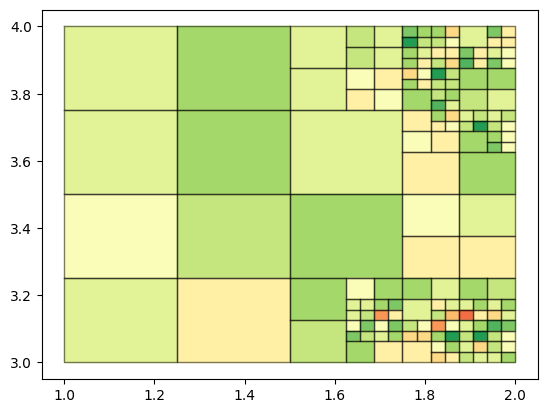

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
test_tree.draw_tree(ax=ax)

In [6]:
class MyFancyQuadTree(BaseTree):
    """Custom fancy quadtree.

    A class for creating a quadtree with randomly sampled points.

    Args:
        x_min (float): Minimum x value for this quadtree.
        x_max (float): Maximum x value for this quadtree.
        y_min (float): Minimum y value for this quadtree.
        y_max (float): Maximum y value for this quadtree.
        split_threshold (float, optional): Threshold discrepancy in order to split nodes. Defaults to 0.2.
        node_statistic (str, optional): Statistic to compute node values ['mean', 'std', or 'median']. Defaults to 'mean'.
        N_points (int, optional): Maximum number of points per node. Defaults to 20.
        min_depth (int, optional): Minimum quadtree depth. Defaults to 3.
        max_depth (int, optional):  Maximum quadtree depth. Defaults to 6.
        N_proc (int, optional): Number of cores for multiprocessing. Defaults to 1.
        verbose (bool, optional): Option to print node values in real time. Defaults to False.
        filename_points (str, optional): Name of output file to save points. Defaults to 'points.txt'.
        filename_nodes (str, optional): Name of output file to save nodes. Defaults to 'nodes.txt'.
        my_arg (str, optional): Argument for this custom class. Defaults to 'foo'.
    """
    
    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float,
                 split_threshold: float = 0.2,
                 node_statistic: str = 'mean',
                 N_points: int = 20,
                 min_depth: int = 3,
                 max_depth: int = 6,
                 N_proc: int = 1,
                 verbose: bool = False,
                 filename_points: str = 'points.txt',
                 filename_nodes: str = 'nodes.txt',
                 my_arg: str = 'foo'
                 ) -> None:

        super().__init__(x_min, x_max, y_min, y_max,
                         split_threshold, node_statistic, N_points,
                         min_depth, max_depth, N_proc,
                         verbose, filename_points, filename_nodes
                         )
        
        # initialize custom args
        self.my_arg = my_arg
        
    
    def custom_function(self, arg1: str, arg2: int, arg3: str = 'bar') -> None:
        """Custom function.
        
        It can do whatever you want!
        
        Args:
            arg1 (str): Your first argument.
            arg2 (int): Your second argument.
            arg3 (str, optional): Your third argument. Defaults to 'bar'.
        """
        
        # ... do something! ...
        
        print("{:}-{:}: {:}".format(arg1, arg2, arg3))
        
        return 
    
    
    def evaluate_point(self, node: QuadNode, rng_seed: int) -> QuadPoint:
        """Evaluate point.

        Calculate the value of one point within a given node.

        Args:
            node (QuadNode): Quadtree node in which to evaulate point.
            rng_seed (int, optional): Random number generator seed. Defaults to 123456.

        Returns:
            QuadPoint: A QuadPoint object.
        """
        rng = np.random.default_rng(rng_seed)
        
        my_int = rng.integers(0, 100)
        
        # call custom function
        self.custom_function(self.my_arg, my_int)
        
        point = QuadPoint(
            rng.uniform(node.x_min, node.x_max),
            rng.uniform(node.y_min, node.y_max),
            my_int
            )
    
        return point

In [7]:
test_tree = MyFancyQuadTree(1,2,3,4, max_depth=4, split_threshold=20,
                            filename_points='./tutorial_outputs/custom_fancy_points.txt',
                            filename_nodes='./tutorial_outputs/custom_fancy_nodes.txt')

In [8]:
test_tree.run_quadtree()

Attempting to load previous results...
   No previous results found, starting new...
foo-56: bar
foo-57: bar
foo-72: bar
foo-35: bar
foo-73: bar
foo-82: bar
foo-44: bar
foo-63: bar
foo-33: bar
foo-1: bar
foo-47: bar
foo-59: bar
foo-44: bar
foo-11: bar
foo-58: bar
foo-67: bar
foo-55: bar
foo-45: bar
foo-97: bar
foo-40: bar
foo-59: bar
foo-49: bar
foo-24: bar
foo-54: bar
foo-41: bar
foo-6: bar
foo-71: bar
foo-54: bar
foo-41: bar
foo-58: bar
foo-13: bar
foo-11: bar
foo-14: bar
foo-81: bar
foo-58: bar
foo-9: bar
foo-46: bar
foo-37: bar
foo-60: bar
foo-36: bar
foo-60: bar
foo-52: bar
foo-83: bar
foo-75: bar
foo-5: bar
foo-60: bar
foo-91: bar
foo-21: bar
foo-99: bar
foo-92: bar
foo-99: bar
foo-76: bar
foo-82: bar
foo-58: bar
foo-73: bar
foo-82: bar
foo-95: bar
foo-62: bar
foo-44: bar
foo-83: bar
foo-94: bar
foo-65: bar
foo-76: bar
foo-78: bar
foo-78: bar
foo-15: bar
foo-95: bar
foo-31: bar
foo-87: bar
foo-49: bar
foo-7: bar
foo-36: bar
foo-86: bar
foo-89: bar
foo-10: bar
foo-18: bar
foo-87: 

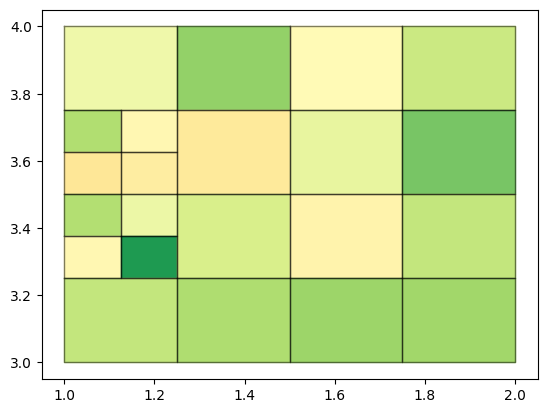

In [9]:
fig, ax = plt.subplots()
test_tree.draw_tree(ax=ax)